# Bài toán 1.  
Dự báo có mua laptop không 

## Tìm hiểu dữ liệu  
Vẽ biểu đồ Q-Q Plot của các cột trong bảng dữ liệu trên, xác định các giá trị Max, Min, Median, Mode

In [1]:
import numpy as np

# Setup data
age = [0, 0, 1, 2, 2, 2, 1, 0, 0, 2, 0, 1, 1, 2]
# 0 is <= 30, 1 is from 31 to 40, 2 is > 40
income = [2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1]
# 0 is low, 1 is medium, 2 is high
student = [0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
# 0 is no, 1 is yes
credit_rating = [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1]
# 0 is fair, 1 is excellent
buys_computer = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

# Set X, y
X = np.array([age, income, student, credit_rating]).T
y = buys_computer

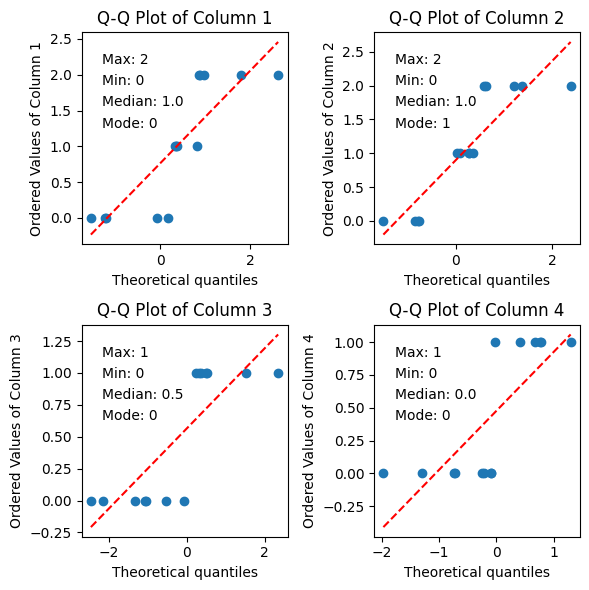

In [8]:
import matplotlib.pyplot as plt
from scipy import stats

# Plot Q-Q plot and calculate statistics for each column
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()

stats_labels = ['Max', 'Min', 'Median', 'Mode']

for i in range(X.shape[1]):
    ax = axs[i]
    data = X[:, i]
    sorted_data = np.sort(data)
    norm = np.random.normal(0, 1, len(data))
    norm.sort()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(norm, sorted_data)
    line = slope * norm + intercept
    
    ax.plot(norm, line, color='red', linestyle='--')
    ax.scatter(norm, sorted_data)
    ax.set_title(f'Q-Q Plot of Column {i+1}')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel(f'Ordered Values of Column {i+1}')
    
    # Calculate statistics
    max_val = np.max(data)
    min_val = np.min(data)
    median_val = np.median(data)
    mode_val = stats.mode(data, axis=None, keepdims=True)[0][0]
    
    stats_values = [max_val, min_val, median_val, mode_val]
    
    # Display statistics
    for j, txt in enumerate(stats_labels):
        ax.annotate(f'{txt}: {stats_values[j]}', (0.1, 0.85 - j*0.1), xycoords='axes fraction', fontsize=10)

plt.tight_layout()
plt.show()

## Sử dụng Decision Tree vs ID3 

### Xây cây

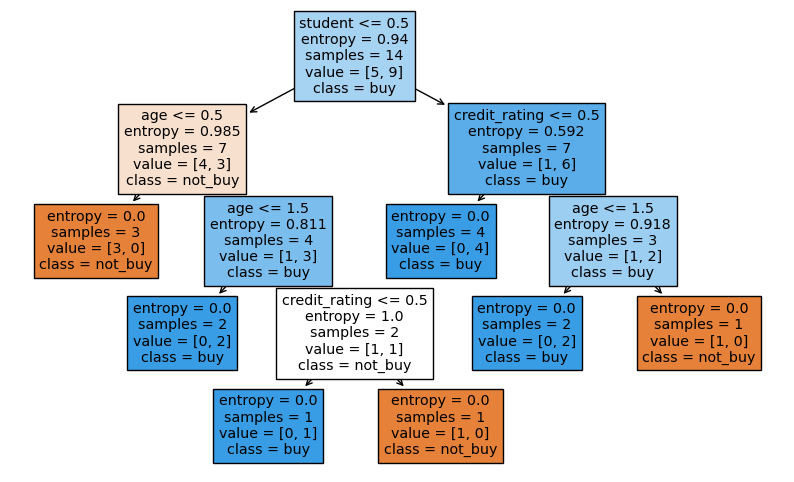

In [5]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 algorithm uses information gain (entropy) for splitting
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

### Tiến hành tỉa cây với sai số chấp nhận được

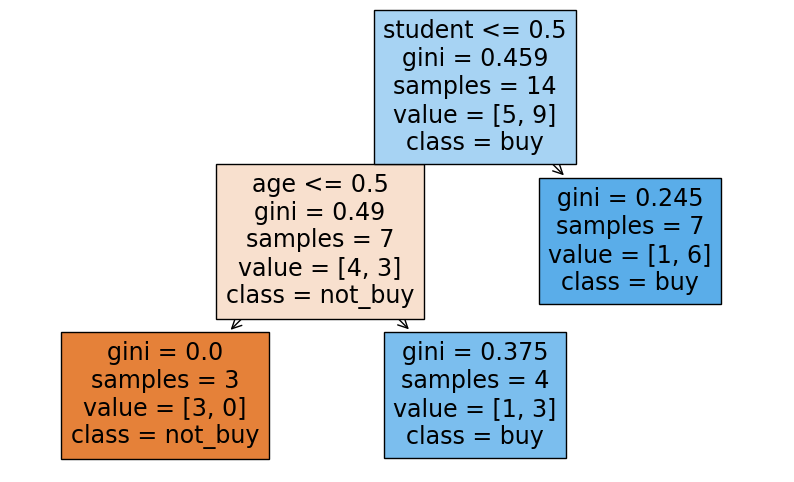

In [6]:
ccp_alpha = 0.07 # cpp_alpha >= 0.11589687 thì sẽ tỉa cho chỉ còn lại 1 node là node gốc (chọn hết là 1 cái, không dùng thuộc tính phân loại -> toàn bộ dữ liệu có nhãn khác sẽ bị sai)
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['age', 'income', 'student', 'credit_rating'], class_names=['not_buy', 'buy'], filled=True)
plt.show()

### Thực hiện với kết quả test  

In [7]:
from sklearn.tree import DecisionTreeClassifier

# Dữ liệu đầu vào
data_to_predict = [
    [1, 1, 1, 0],  # a) ("31..40", "medium", "yes", "fair")
    [2, 2, 0, 0],  # b) (">40", "high", "no", "fair")
    [0, 0, 0, 1]   # c) ("<=30", "low", "no", "excellent")
]

# Tính toán kết quả
predicted_results = clf.predict(data_to_predict)

# In kết quả
for i, result in enumerate(predicted_results):
    print(f"Bản ghi {chr(97 + i)} dự đoán là: {'buy' if result == 1 else 'not_buy'}")


Bản ghi a dự đoán là: buy
Bản ghi b dự đoán là: buy
Bản ghi c dự đoán là: not_buy


## Sử dụng Gaussian Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

# Dữ liệu đầu vào
data_to_predict = [
    [1, 1, 1, 0],  # ("31..40", "medium", "yes", "fair")
    [2, 2, 0, 0],  # (">40", "high", "no", "fair")
    [0, 0, 0, 1]   # ("<=30", "low", "no", "excellent")
]

# Tạo và huấn luyện mô hình
gnb = GaussianNB()
gnb.fit(X, y)

# Tính toán kết quả
predicted_results = gnb.predict(data_to_predict)

# In kết quả
for i, result in enumerate(predicted_results):
    print(f"Bản ghi {chr(97 + i)} dự đoán là: {'buy' if result == 1 else 'not_buy'}")

Bản ghi a dự đoán là: buy
Bản ghi b dự đoán là: not_buy
Bản ghi c dự đoán là: not_buy


## Sử dụng Gradient Descent

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

# Dữ liệu đầu vào
data_to_predict = [
    [1, 1, 1, 0],  # ("31..40", "medium", "yes", "fair")
    [2, 2, 0, 0],  # (">40", "high", "no", "fair")
    [0, 0, 0, 1]   # ("<=30", "low", "no", "excellent")
]

# Tạo và huấn luyện mô hình
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X, y)

# Tính toán kết quả
predicted_results = gb_clf.predict(data_to_predict)

# In kết quả
for i, result in enumerate(predicted_results):
    print(f"Bản ghi {chr(97 + i)} dự đoán là: {'buy' if result == 1 else 'not_buy'}")

Bản ghi a dự đoán là: buy
Bản ghi b dự đoán là: buy
Bản ghi c dự đoán là: buy


# Bài toán 2.  
Dự báo có chơi golf hay không

## Tìm hiểu dữ liệu

In [11]:
import numpy

outlook = [0,0,1,2,2,2,1,0,0,2,0,1,1,2]
# 0 is rainy, 1 is overcast, 2 is sunny
temp = [2,2,2,1,0,0,0,1,0,1,1,1,2,1]
# 0 is cool, 1 is mid, 2 is hot
humidity = [1,1,1,1,0,0,0,1,0,0,0,1,0,1]
# 0 is normal, 1 is high
windy = [0,1,0,0,0,1,1,0,0,0,1,1,0,1]
# 0 is False, 1 is True
play_golf = [0,0,1,1,1,0,1,0,1,1,1,1,1,0]
# 0 is False, 1 is True

print(len(outlook), len(temp), len(humidity), len(windy), len(play_golf))

14 14 14 14 14


In [12]:
# Set X, y
X = np.array([outlook, temp, humidity, windy]).T
y = play_golf

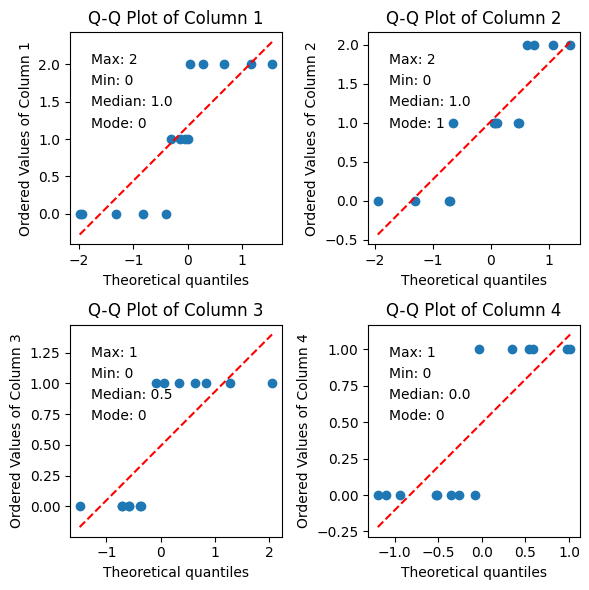

In [13]:
import matplotlib.pyplot as plt
from scipy import stats

# Plot Q-Q plot and calculate statistics for each column
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs = axs.flatten()

stats_labels = ['Max', 'Min', 'Median', 'Mode']

for i in range(X.shape[1]):
    ax = axs[i]
    data = X[:, i]
    sorted_data = np.sort(data)
    norm = np.random.normal(0, 1, len(data))
    norm.sort()
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(norm, sorted_data)
    line = slope * norm + intercept
    
    ax.plot(norm, line, color='red', linestyle='--')
    ax.scatter(norm, sorted_data)
    ax.set_title(f'Q-Q Plot of Column {i+1}')
    ax.set_xlabel('Theoretical quantiles')
    ax.set_ylabel(f'Ordered Values of Column {i+1}')
    
    # Calculate statistics
    max_val = np.max(data)
    min_val = np.min(data)
    median_val = np.median(data)
    mode_val = stats.mode(data, axis=None, keepdims=True)[0][0]
    
    stats_values = [max_val, min_val, median_val, mode_val]
    
    # Display statistics
    for j, txt in enumerate(stats_labels):
        ax.annotate(f'{txt}: {stats_values[j]}', (0.1, 0.85 - j*0.1), xycoords='axes fraction', fontsize=10)

plt.tight_layout()
plt.show()

## Sử dụng Decision Tree vs ID3

### Tạo cây

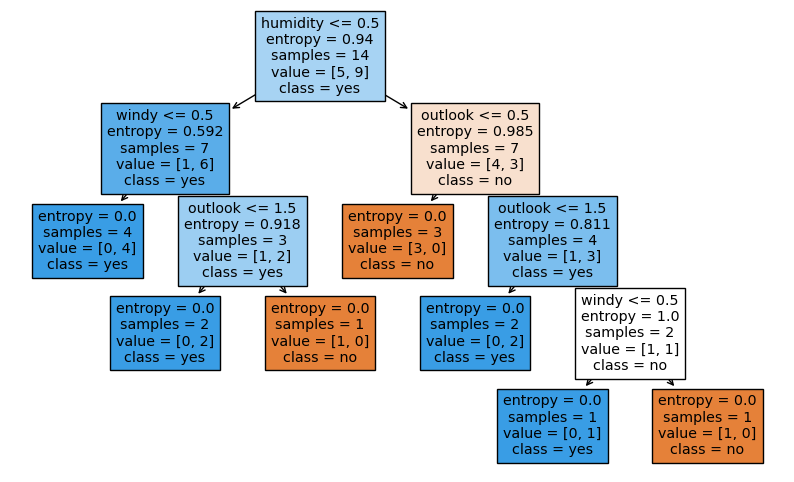

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Create and fit the decision tree model
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 algorithm uses information gain (entropy) for splitting
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['outlook', 'temp', 'humidity', 'windy'], class_names=['no', 'yes'], filled=True)
plt.show()

### Tỉa cây

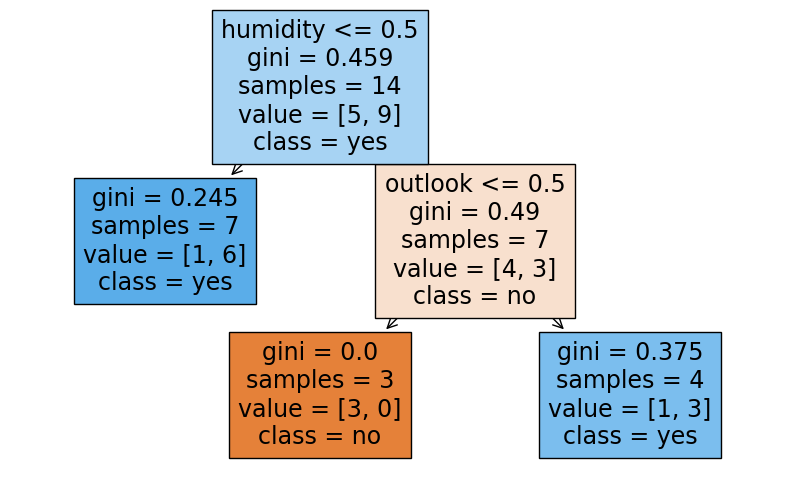

In [15]:
ccp_alpha = 0.07 # cpp_alpha >= 0.11589687 thì sẽ tỉa cho chỉ còn lại 1 node là node gốc (chọn hết là 1 cái, không dùng thuộc tính phân loại -> toàn bộ dữ liệu có nhãn khác sẽ bị sai)
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
clf.fit(X, y)

# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=['outlook', 'temp', 'humidity', 'windy'], class_names=['no', 'yes'], filled=True)
plt.show()

### Test

In [17]:
# Dữ liệu đầu vào
data_to_predict = [
    [1, 1, 1, 0],  # a) ("overcast", "mid", "high", "False")
    [2, 2, 0, 0],  # b) ("sunny", "hot", "normal", "False")
    [0, 0, 0, 1]   # c) ("rainy", "cool", "normal", "True")
]

# Tính toán kết quả
predicted_results = clf.predict(data_to_predict)

# In kết quả
for i, result in enumerate(predicted_results):
    print(f"Bản ghi {chr(97 + i)} dự đoán là: {'True' if result == 1 else 'False'}")


Bản ghi a dự đoán là: True
Bản ghi b dự đoán là: True
Bản ghi c dự đoán là: True


## Sử dụng Gaussian Bayes

In [18]:
# Dữ liệu đầu vào
data_to_predict = [
    [1, 1, 1, 0],  # a) ("overcast", "mid", "high", "False")
    [2, 2, 0, 0],  # b) ("sunny", "hot", "normal", "False")
    [0, 0, 0, 1]   # c) ("rainy", "cool", "normal", "True")
]

from sklearn.naive_bayes import GaussianNB

# Tạo và huấn luyện mô hình
gnb = GaussianNB()
gnb.fit(X, y)

# Tính toán kết quả
predicted_results = gnb.predict(data_to_predict)

# In kết quả
for i, result in enumerate(predicted_results):
    print(f"Bản ghi {chr(97 + i)} dự đoán là: {'True' if result == 1 else 'False'}")

Bản ghi a dự đoán là: True
Bản ghi b dự đoán là: True
Bản ghi c dự đoán là: True


## Sử dụng Gradient Descent

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

# Dữ liệu đầu vào
data_to_predict = [
    [1, 1, 1, 0],  # a) ("overcast", "mid", "high", "False")
    [2, 2, 0, 0],  # b) ("sunny", "hot", "normal", "False")
    [0, 0, 0, 1]   # c) ("rainy", "cool", "normal", "True")
]

# Tạo và huấn luyện mô hình
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X, y)

# Tính toán kết quả
predicted_results = gb_clf.predict(data_to_predict)

# In kết quả
for i, result in enumerate(predicted_results):
    print(f"Bản ghi {chr(97 + i)} dự đoán là: {'True' if result == 1 else 'False'}")

Bản ghi a dự đoán là: True
Bản ghi b dự đoán là: True
Bản ghi c dự đoán là: True
